# IMPORTING LIBRARIES

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# Loading DataSet

In [11]:
titanic_data = pd.read_csv(r"C:\Users\Udhir Dubey\Downloads\archive (1)\tested.csv")

In [12]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
X = titanic_data.drop("Survived", axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Identify categorical columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

In [15]:
# Identify numerical columns
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']


In [16]:
# Preprocessing for categorical data: one-hot encoding
categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_categorical = categorical_encoder.fit_transform(X_train[categorical_cols])
X_test_categorical = categorical_encoder.transform(X_test[categorical_cols])

In [17]:
# Preprocessing for numerical data: imputing missing values with mean
numerical_imputer = SimpleImputer(strategy='mean')
X_train_numerical = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test_numerical = numerical_imputer.transform(X_test[numerical_cols])

In [18]:
# Combine preprocessed categorical and numerical data
X_train_preprocessed = pd.DataFrame(
    data = X_train_numerical,
    columns = numerical_cols
).join(pd.DataFrame(
    data = X_train_categorical,
    columns = categorical_encoder.get_feature_names(input_features=categorical_cols)
))

X_test_preprocessed = pd.DataFrame(
    data = X_test_numerical,
    columns = numerical_cols
).join(pd.DataFrame(
    data = X_test_categorical,
    columns = categorical_encoder.get_feature_names(input_features=categorical_cols)
))

# prediction on using testing set and checking of accuracy

In [21]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_preprocessed, y_train)
y_pred = clf.predict(X_test_preprocessed)


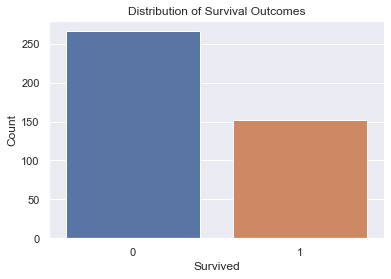

In [23]:
# Create a countplot for the 'Survived' column
sns.set(style="darkgrid")
sns.countplot(x='Survived', data=titanic_data)

# Add labels and a title
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Distribution of Survival Outcomes")

# Show the plot
plt.show()

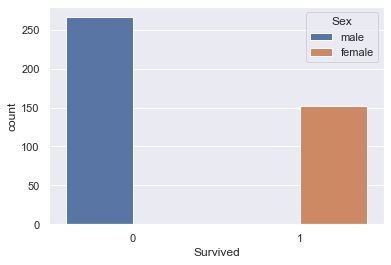

In [24]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.show()

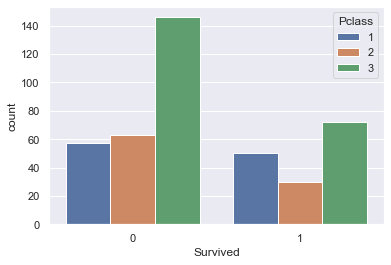

In [25]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.show()

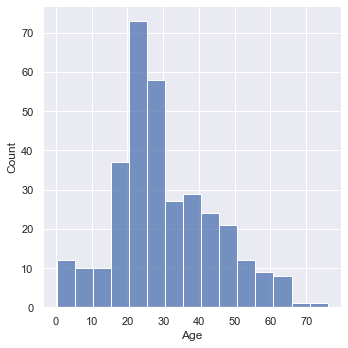

In [27]:
sns.displot(X['Age'])

In [22]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
